In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [2]:
DATA_IN_PATH = './data_in/'
print('파일 크기: ')
for file in os.listdir(DATA_IN_PATH):
    if 'txt' in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')
        
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

파일 크기: 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 1. 리뷰 길이 확인

In [3]:
print('전체 학습 데이터의 개수: {}'.format(len(train_data)))

train_length = train_data['document'].astype(str).apply(len)
print('\n데이터의 길이 값: ')
train_length.head()

전체 학습 데이터의 개수: 150000

데이터의 길이 값: 


0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of Review')

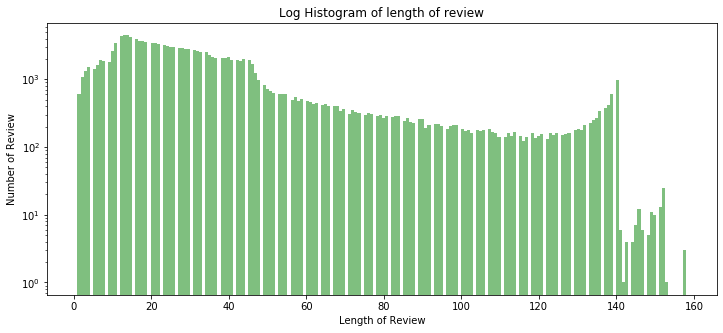

In [4]:
plt.figure(figsize = (12, 5))
plt.hist(train_length, bins = 200, alpha = 0.5, color = 'green', label = 'word')
plt.yscale('log', nonposy = 'clip')
plt.title('Log Histogram of length of review')
plt.xlabel('Length of Review')
plt.ylabel('Number of Review')

In [5]:
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최댓값: 158
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.58
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 42.0


{'whiskers': [<matplotlib.lines.Line2D at 0x222dec920c8>,
 'caps': [<matplotlib.lines.Line2D at 0x222df5078c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x222dec8ca88>],
 'medians': [<matplotlib.lines.Line2D at 0x222df4e8fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x222dec934c8>],
 'means': [<matplotlib.lines.Line2D at 0x222dec93188>]}

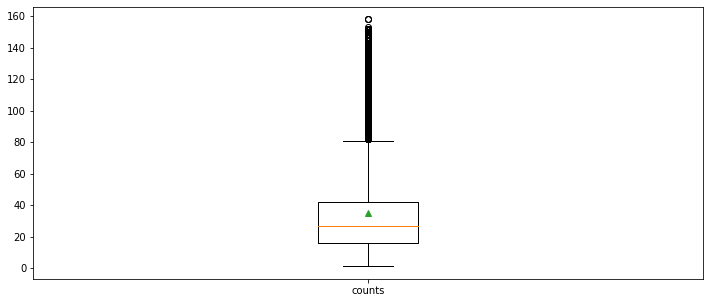

In [6]:
plt.figure(figsize = (12, 5))
plt.boxplot(train_length, labels = ['counts'], showmeans = True)

### 2. 어휘 빈도 분석

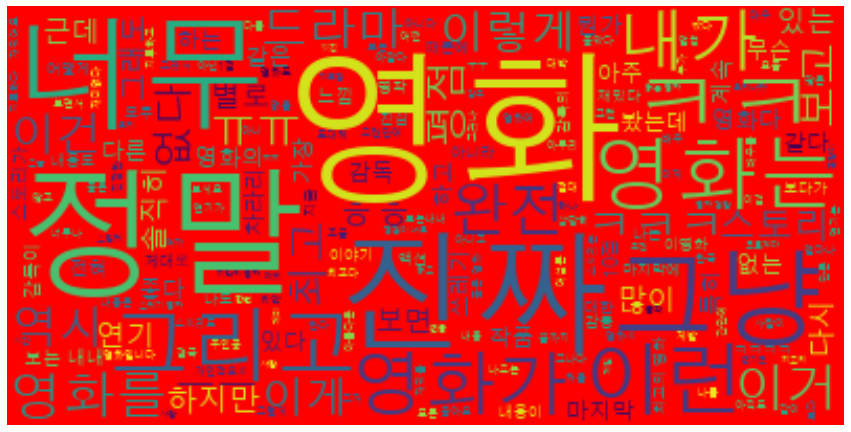

In [7]:
train_review = [review for review in train_data['document'] if type(review) is str]
wordcloud = WordCloud(font_path = DATA_IN_PATH + 'H2GTRM.TTF', background_color = 'red').generate(' '.join(train_review))
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

긍정 리뷰 개수: 74827
부정 리뷰 개수: 75173


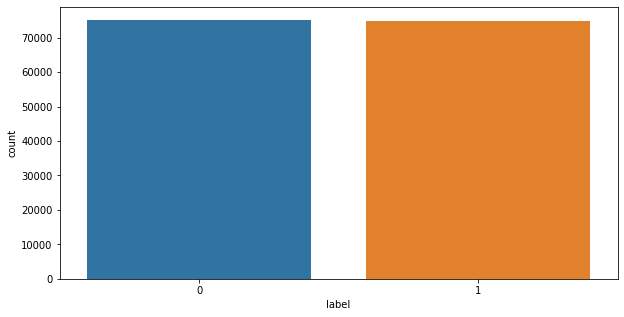

In [8]:
fig, axe = plt.subplots(ncols = 1)
fig.set_size_inches(10, 5)
sns.countplot(train_data['label'])

print('긍정 리뷰 개수: {}'.format(train_data['label'].value_counts()[1]))
print('부정 리뷰 개수: {}'.format(train_data['label'].value_counts()[0]))

### 3. 각 리뷰의 단어 수 확인

Text(0, 0.5, 'Number of reviews')

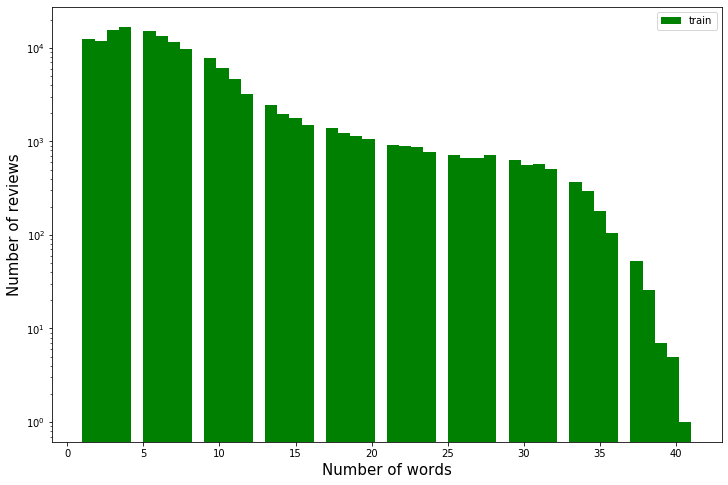

In [9]:
train_word_counts = train_data['document'].astype(str).apply(lambda x: len(x.split(' ')))

plt.figure(figsize = (12, 8))
plt.hist(train_word_counts, bins = 50, facecolor = 'green', label = 'train')
plt.yscale('log', nonposy = 'clip') #Non-positive values in y can be masked as invalid, or clipped to a very small positive number.
plt.legend()
plt.xlabel('Number of words', fontsize = 15)
plt.ylabel('Number of reviews', fontsize = 15)

In [10]:
print('리뷰 단어 개수 최댓값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최솟값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간값: {}'.format(np.median(train_word_counts)))
print('리뷰 단어 개수 제1사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제3사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최댓값: 41
리뷰 단어 개수 최솟값: 1
리뷰 단어 개수 평균값: 7.58
리뷰 단어 개수 표준편차: 6.51
리뷰 단어 개수 중간값: 6.0
리뷰 단어 개수 제1사분위: 3.0
리뷰 단어 개수 제3사분위: 9.0


### 4. 각 데이터에 대해 특수문자 유무 확인

In [11]:
#마침표와 물음표만 확인하자
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print('물음표가 있는 질문: {:.2f}%'.format(qmarks * 100))
print('마침표가 있는 질문: {:.2f}%'.format(fullstop * 100))

물음표가 있는 질문: 8.25%
마침표가 있는 질문: 51.76%


### 5. 데이터 전처리

In [4]:
import numpy as np
import pandas as pd
import re
import json
from konlpy.tag import Okt
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer

C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\s

In [5]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', header = 0, delimiter = '\t', quoting = 3)
train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
review_text = re.sub("[^가-힣ㄱ-하-ㅣ\\s]", '', train_data['document'][0])
print(review_text)

okt = Okt()
review_text = okt.morphs(review_text, stem = True)
print(review_text)

stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
clean_review = [token for token in review_text if not token in stop_words]
clean_review

아 더빙 진짜 짜증나네요 목소리


C:\Users\ehrme\Anaconda3\envs\sugyeong_2019\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


['아', '더빙', '진짜', '짜증나다', '목소리']


['더빙', '진짜', '짜증나다', '목소리']

In [7]:
#전처리 과정을 함수로 만들기
def preprocessing(review, okt, remove_stopwords = False, stop_words = []):
    review_text = re.sub('[^가-힣ㄱ-하-ㅣ\\s]','',review)
    word_review = okt.morphs(review_text, stem = True)
    
    if remove_stopwords:
        word_review = [token for token in word_review if not token in stop_words]
    
    return word_review

stop_words = set(['은','는','이','가','하','아','것','들','의','있','되','수','보','주','등','한'])
okt = Okt()
clean_train_review = []

for review in train_data['document']:
    if type(review) == str:
        clean_train_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    else:
        clean_train_review.append([])
        
clean_train_review[:4]

[['더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다'],
 ['너', '무재', '밓었', '다그', '래서', '보다', '추천', '다'],
 ['교도소', '이야기', '구먼', '솔직하다', '재미', '없다', '평점', '조정']]

In [8]:
test_data = pd.read_csv(DATA_IN_PATH + 'ratings_test.txt', header = 0, delimiter= '\t', quoting = 3)

clean_test_review = []

for review in test_data['document']:
    if type(review) == str:
        clean_test_review.append(preprocessing(review, okt, remove_stopwords = True, stop_words = stop_words))
    else:
        clean_test_review.append([])

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_train_review)
train_sequences = tokenizer.texts_to_sequences(clean_train_review)
test_sequences = tokenizer.texts_to_sequences(clean_test_review)
word_vocab = tokenizer.word_index

MAX_SEQUENCE_LENGTH = 8

train_inputs = pad_sequences(train_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')
train_labels = np.array(train_data['label'])

test_inputs = pad_sequences(test_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding = 'post')
test_labels = np.array(test_data['label'])

print(len(train_inputs), len(train_labels), len(test_inputs), len(test_labels))

150000 150000 50000 50000


#### 데이터들을 모델링 과정에서 사용할 수 있도록 저장하기

In [10]:
DATA_IN_PATH = './data_in/'
TRAIN_INPUT_DATA = 'nsmc_train_input.npy'
TRAIN_LABEL_DATA = 'nsmc_train_label.npy'
TEST_INPUT_DATA = 'nsmc_test_input.npy'
TEST_LABEL_DATA = 'nsmc_test_label.npy'
DATA_CONFIGS = 'data_configs.json'

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

import os
if not os.path.exists(DATA_IN_PATH):
    os.makedirs(DATA_IN_PATH)
    
np.save(open(DATA_IN_PATH + TRAIN_INPUT_DATA, 'wb'), train_inputs)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'wb'), train_labels)
np.save(open(DATA_IN_PATH + TEST_INPUT_DATA, 'wb'), test_inputs)
np.save(open(DATA_IN_PATH + TEST_LABEL_DATA, 'wb'), test_labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w', encoding = 'utf-8'), ensure_ascii=False)

### 6. CNN을 이용한 모델링

In [11]:
import os
from datetime import datetime
import tensorflow as tf
import numpy as np
import json
from sklearn.model_selection import train_test_split

In [19]:
DATA_IN_PATH = './data_in/'
DATA_OUT_PATH = './data_out/'
INPUT_TRAIN_DATA_FILE_NAME = 'nsmc_train_input.npy'
LABEL_TRAIN_DATA_FILE_NAME = 'nsmc_train_label.npy'
DATA_CONFIGS_FILE_NAME = 'nsmc_data_configs.json'

input_data = np.load(open(DATA_IN_PATH + INPUT_TRAIN_DATA_FILE_NAME, 'rb'))
label_data = np.load(open(DATA_IN_PATH + LABEL_TRAIN_DATA_FILE_NAME, 'rb'))
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS_FILE_NAME, "r", encoding = 'utf-8'))

In [13]:
TEST_SPLIT = 0.1
RNG_SEED = 13371447
VOCAB_SIZE = prepro_configs['vocab_size']+1
EMB_SIZE = 128
BATCH_SIZE = 16
NUM_EPOCHS = 1

input_train, input_eval, label_train, label_eval = train_test_split(input_data, label_data, test_size = TEST_SPLIT, random_state = RNG_SEED)

#### 6-1 에스티메이터 데이터 입력 함수 정의

In [14]:
def mapping_fn(X, Y):
    input, label = {'x': X}, Y
    return input, label

def train_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_train, label_train))
    dataset = dataset.shuffle(buffer_size = len(input_train))
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.map(mapping_fn)
    dataset = dataset.repeat(count = NUM_EPOCHS)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

def eval_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((input_eval, label_eval))
    dataset = dataset.shuffle(buffer_size = len(input_eval))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

In [15]:
#모델함수 구현
from tensorflow.python import keras

def model_fn(features, labels, mode, params):
    TRAIN = mode == tf.estimator.ModeKeys.TRAIN
    EVAL = mode == tf.estimator.ModeKeys.EVAL
    PREDICT = mode == tf.estimator.ModeKeys.PREDICT
    
    embedding_layer = tf.keras.layers.Embedding(
                VOCAB_SIZE, EMB_SIZE)(features['x'])
    dropout_emb = tf.keras.layers.Dropout(rate = 0.2)(embedding_layer)
    
    conv = tf.keras.layers.Conv1D(filters = 32,
                                 kernel_size = 3,
                                 padding = 'same',
                                 activation = tf.nn.relu)(dropout_emb)
    pool = tf.keras.layers.GlobalMaxPool1D()(conv)
    hidden = tf.keras.layers.Dense(units = 250, activation = tf.nn.relu)(pool)
    dropout_hidden = tf.keras.layers.Dropout(rate = 0.2)(hidden, training = TRAIN)
    logits = tf.keras.layers.Dense(units = 1)(dropout_hidden)
    
    if labels is not None:
        labels = tf.reshape(labels, [-1, 1])
    
    if TRAIN:
        global_step = tf.train.get_global_step()
        loss = tf.losses.sigmoid_cross_entropy(labels, logits)
        train_op = tf.train.AdamOptimizer(0.001).minimize(loss, global_step)
        
        return tf.estimator.EstimatorSpec(mode = mode, train_op = train_op, loss = loss)
    
    elif EVAL:
        loss = tf.losses.sigmoid_cross_entropy(labels, logits)
        pred = tf.nn.sigmoid(logits)
        accuracy = tf.metrics.accuracy(labels, tf.round(pred))
        
        return tf.estimator.EstimatorSpec(mode = mode, loss = loss, eval_metric_ops = {'acc': accuracy})
    
    elif PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode, predictions = {'prob': tf.nn.sigmoid(logits),})

In [16]:
est = tf.estimator.Estimator(model_fn, model_dir = 'data_out/checkpoint/cnn_model')
time_start = datetime.utcnow()
print('Experiment started at {}'.format(time_start.strftime('%H:%M:%S')))
print('...........................................................')

est.train(train_input_fn)

time_end = datetime.utcnow()
print('...........................................................')
print('Experiment finished at {}'.format(time_end.strftime('%H:%M:%S')))
print('')
time_elapsed = time_end - time_start
print('Experiment elapsed time {} seconds'.format(time_elapsed.total_seconds()))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'data_out/checkpoint/cnn_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001FB72C41DC8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Experiment started at 15:07:26
................................................

INFO:tensorflow:loss = 0.2998739, step = 12439 (5.732 sec)
INFO:tensorflow:global_step/sec: 17.6931
INFO:tensorflow:loss = 0.26189908, step = 12539 (5.652 sec)
INFO:tensorflow:global_step/sec: 18.816
INFO:tensorflow:loss = 0.2814921, step = 12639 (5.313 sec)
INFO:tensorflow:global_step/sec: 19.0107
INFO:tensorflow:loss = 0.29593295, step = 12739 (5.268 sec)
INFO:tensorflow:global_step/sec: 18.5438
INFO:tensorflow:loss = 0.1608403, step = 12839 (5.387 sec)
INFO:tensorflow:global_step/sec: 19.0817
INFO:tensorflow:loss = 0.27960107, step = 12939 (5.240 sec)
INFO:tensorflow:global_step/sec: 16.1445
INFO:tensorflow:loss = 0.20933786, step = 13039 (6.195 sec)
INFO:tensorflow:global_step/sec: 17.5988
INFO:tensorflow:loss = 0.40157947, step = 13139 (5.682 sec)
INFO:tensorflow:global_step/sec: 18.5748
INFO:tensorflow:loss = 0.3195241, step = 13239 (5.384 sec)
INFO:tensorflow:global_step/sec: 18.8001
INFO:tensorflow:loss = 0.34087577, step = 13339 (5.319 sec)
INFO:tensorflow:global_step/sec: 19.

In [17]:
valid = est.evaluate(eval_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-03T00:17:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data_out/checkpoint/cnn_model\model.ckpt-16876
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-03-00:17:44
INFO:tensorflow:Saving dict for global step 16876: acc = 0.82926667, global_step = 16876, loss = 0.38449472
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16876: data_out/checkpoint/cnn_model\model.ckpt-16876


In [21]:
INPUT_TEST_DATA = 'nsmc_test_input.npy'
LABEL_TEST_DATA = 'nsmc_test_label.npy'

test_input_data = np.load(open(DATA_IN_PATH + INPUT_TEST_DATA, 'rb'))
test_label_data = np.load(open(DATA_IN_PATH + LABEL_TEST_DATA, 'rb'))

In [22]:
def test_input_fn():
    dataset = tf.data.Dataset.from_tensor_slices((test_input_data, test_label_data))
    dataset = dataset.batch(16)
    dataset = dataset.map(mapping_fn)
    iterator = dataset.make_one_shot_iterator()
    
    return iterator.get_next()

predict = est.evaluate(test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-12-03T00:30:54Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from data_out/checkpoint/cnn_model\model.ckpt-16876
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-12-03-00:31:08
INFO:tensorflow:Saving dict for global step 16876: acc = 0.83032, global_step = 16876, loss = 0.38410047
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 16876: data_out/checkpoint/cnn_model\model.ckpt-16876
